In [232]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from mpl_toolkits import mplot3d
from scipy import stats
import statsmodels.api as sm

In [227]:
directory = Path('Sea Ice')

files = [file_name for file_name in os.listdir(directory) if file_name.endswith('.csv')]

SIE_N = pd.DataFrame(columns=['year','mo','extent'])
SIE_S = pd.DataFrame(columns=['year','mo','extent'])

# Import SIE for North and South
for indx,file in enumerate(files):
    path_to_file = os.path.join(directory, file)
    data_file = pd.read_csv(path_to_file) 
    data_file.columns = data_file.columns.str.strip()
    if (data_file['region'].str.strip() == 'N').all() == True:
        SIE_N = pd.concat([SIE_N, data_file[['year','mo','extent']]])
    elif (data_file['region'].str.strip() == 'S').all() == True:
        SIE_S = pd.concat([SIE_S, data_file[['year','mo', 'extent']]]) 
        

# Put in chronological order
SIE_N = SIE_N.sort_values(['year','mo'])
SIE_S = SIE_S.sort_values(['year','mo'])


# Substitute -9999 values for NaN
SIE_N['extent'] = SIE_N['extent'].mask(SIE_N['extent'] < SIE_N['extent'].quantile(0.01))

(4.0, 17.0)

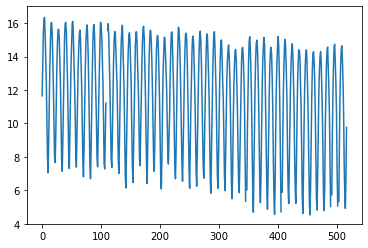

In [258]:
#print(np.array(SIE_N['area']))
plt.plot(np.array(SIE_N['extent']))
plt.ylim([4,17])

In [272]:
# Import Temperature Data
directory = Path('Temperature')

files = [file_name for file_name in os.listdir(directory) if file_name.endswith('.csv')]
file = files[0]
path_to_file = os.path.join(directory, file)
data_file = pd.read_csv(path_to_file) 
data_file.columns = data_file.columns.str.strip()
T = data_file.iloc[1978-1880:, 1:13]

# Put values in chronological order in a flat list
T_all = T.values.tolist()
T_flat = [item for sublist in T_all for item in sublist]
T_flat = T_flat[10:-1]
T_flat = [float(i) for i in T_flat]

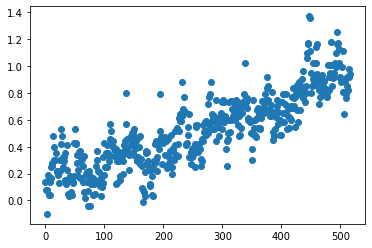

In [273]:
t = np.linspace(0,len(T_flat)-1,len(T_flat))
plt.scatter(t,T_flat)

In [277]:
X = sm.add_constant(T_flat)
model = sm.OLS(SIE_N['extent'], X, missing='drop')
results = model.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.642
Date:                Sun, 19 Dec 2021   Prob (F-statistic):             0.0317
Time:                        15:02:19   Log-Likelihood:                -1317.8
No. Observations:                 511   AIC:                             2640.
Df Residuals:                     509   BIC:                             2648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0064      0.300     39.999      0.000      11.417      12.596
x1            -1.1071      0.514     -2.155      0.032      -2.117      -0.098
==============================================================================
Omnibus:                      235.495   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.659
Skew:                          -0.388   Prob(JB):                     1.48e-09
Kurtosis:                       1.857   Cond. No.                         4.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const    12.006434
x1       -1.107082
dtype: float64


(0.0, 20.0)

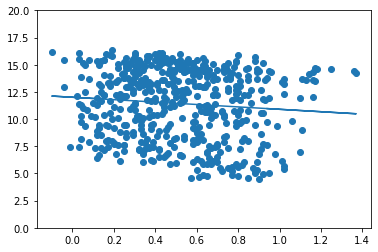

In [276]:
print(results.params)
b=12.0064
m=-1.1071
fit= m*np.array(T_flat) + b
plt.figure()
plt.scatter(T_flat, np.array(SIE_N['extent']))
plt.plot(T_flat, fit)
plt.ylim([0,20])